In [39]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
!pip install -q ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# # metadata
# print(statlog_german_credit_data.metadata)

# # variable information
# print(statlog_german_credit_data.variables)

In [4]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [5]:
le = [
    'Attribute1',
    'Attribute3',
    'Attribute4',
    'Attribute6',
    'Attribute7',
    'Attribute9',
    'Attribute10',
    'Attribute12',
    'Attribute14',
    'Attribute15',
    'Attribute17',
    'Attribute19',
    'Attribute20',
]

In [19]:
label_enc = LabelEncoder()
label_enc.fit(X[le].to_numpy().flatten())

for col in le:
    X.loc[:, (col)] = label_enc.transform(X[col])


In [20]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,cluster
0,3,6,29,34,1169,44,49,4,52,0,...,5,67,13,15,2,19,1,22,23,1
1,4,48,27,34,5951,40,47,2,51,0,...,5,22,13,15,1,19,1,21,23,1
2,10,12,29,37,2096,40,48,2,52,0,...,5,49,13,15,1,18,2,21,23,2
3,3,42,27,33,7882,40,48,2,52,2,...,6,45,13,16,1,19,2,21,23,1
4,3,24,28,30,4870,40,47,3,52,0,...,8,53,13,16,2,19,2,21,23,1


In [14]:
norm = StandardScaler()
norm.fit(X)
df = norm.transform(X)

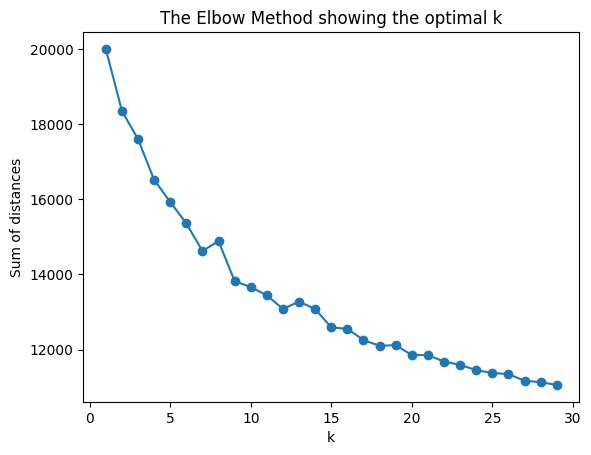

In [ ]:
K = range(1, 30)
models = [KMeans(n_clusters=k).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
model = KMeans(n_clusters=2)
model.fit(X[le])
X['cluster'] = model.labels_
X.groupby('cluster').mean()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
cluster,,,,,,,,,,,,,,,,,,,,
0,3.495396,22.003683,27.353591,33.230203,3498.386740,40.834254,47.252302,2.968692,51.666667,0.206262,2.874770,6.395948,34.716390,12.640884,14.917127,1.368324,18.887661,1.152855,21.383057,23.036832
1,9.862144,19.595186,27.772429,33.332604,3001.387309,41.426696,47.540481,2.978118,51.700219,0.07221,2.809628,6.31291,36.531729,12.715536,14.943107,1.452954,18.923414,1.157549,21.428884,23.037199


In [22]:
X['cluster'] = X['cluster']+1
X['cluster'].value_counts()

,count
cluster,
1,543
2,457


In [23]:
y['class'].value_counts()

,count
class,
1,700
2,300


In [26]:
X[le]

,Attribute1,Attribute3,Attribute4,Attribute6,Attribute7,Attribute9,Attribute10,Attribute12,Attribute14,Attribute15,Attribute17,Attribute19,Attribute20
0,3,29,34,44,49,52,0,5,13,15,19,22,23
1,4,27,34,40,47,51,0,5,13,15,19,21,23
2,10,29,37,40,48,52,0,5,13,15,18,21,23
3,3,27,33,40,48,52,2,6,13,16,19,21,23
4,3,28,30,40,47,52,0,8,13,16,19,21,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,27,33,40,48,51,0,5,13,15,18,21,23
996,3,27,31,40,47,50,0,6,13,15,20,22,23
997,10,27,34,40,49,52,0,7,13,15,19,21,23
998,3,27,34,40,47,52,0,8,13,16,19,22,23


In [24]:
accuracy_score(y, X['cluster'])

0.363

In [32]:
norm = StandardScaler()
norm.fit(X[le])
df = norm.transform(X[le])

model = KMeans(n_clusters=2)
model.fit(df)
X['cluster'] = model.labels_
X['cluster'] = X['cluster']+1

accuracy_score(y, X['cluster'])

0.549

In [37]:
model = KMeans(n_clusters=2)
model.fit(X.loc[:, ~X.columns.isin(le)])
X['cluster'] = model.labels_
X['cluster'] = X['cluster']+1

accuracy_score(y, X['cluster'])

0.329

In [27]:
le

['Attribute1',
 'Attribute3',
 'Attribute4',
 'Attribute6',
 'Attribute7',
 'Attribute9',
 'Attribute10',
 'Attribute12',
 'Attribute14',
 'Attribute15',
 'Attribute17',
 'Attribute19',
 'Attribute20']

In [52]:
acc_results = []

norm = StandardScaler()
norm.fit(X.loc[:, ~X.columns.isin(le)])
df = norm.transform(X.loc[:, ~X.columns.isin(le)])

model = KMeans(n_clusters=2)
for _ in range(100):
    model.fit(df)
    X['cluster'] = model.labels_
    X['cluster'] = X['cluster']+1

    acc_results.append(accuracy_score(y, X['cluster']))


Text(0.5, 1.0, 'Accuracy of K-means without label encoder data')

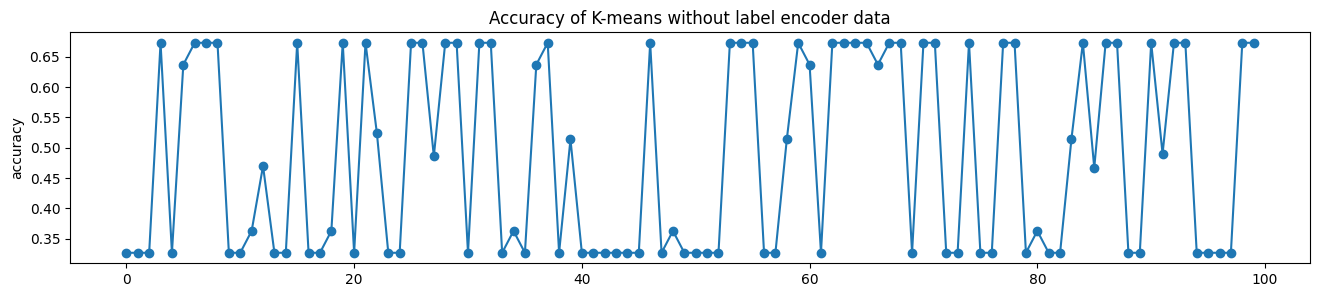

In [53]:
plt.figure(figsize=(16, 3))
plt.plot(np.arange(100), acc_results, marker='o')
plt.ylabel('accuracy')
plt.title('Accuracy of K-means without label encoder data')

In [54]:
acc_results = []

norm = StandardScaler()
norm.fit(X)
df = norm.transform(X)

model = KMeans(n_clusters=2)
for _ in range(100):
    model.fit(df)
    X['cluster'] = model.labels_
    X['cluster'] = X['cluster']+1

    acc_results.append(accuracy_score(y, X['cluster']))

Text(0.5, 1.0, 'Accuracy of K-means with all data')

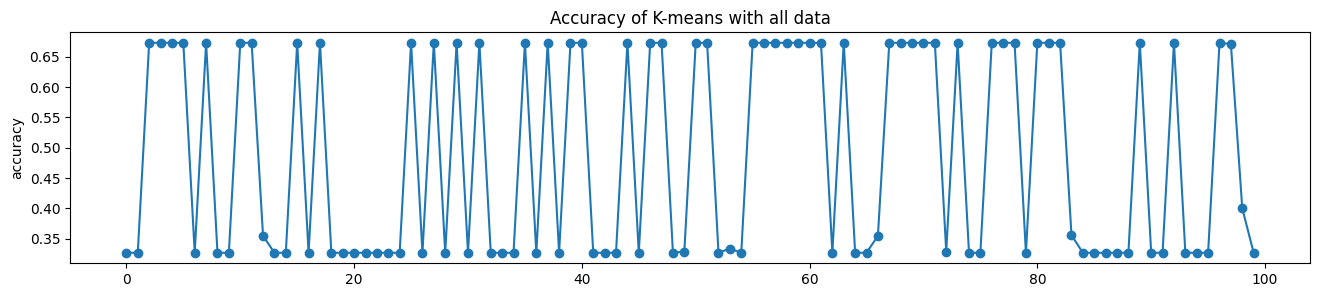

In [55]:
plt.figure(figsize=(16, 3))
plt.plot(np.arange(100), acc_results, marker='o')
plt.ylabel('accuracy')
plt.title('Accuracy of K-means with all data')

In [56]:
acc_results = []

norm = StandardScaler()
norm.fit(X[le])
df = norm.transform(X[le])

model = KMeans(n_clusters=2)
for _ in range(100):
    model.fit(df)
    X['cluster'] = model.labels_
    X['cluster'] = X['cluster']+1

    acc_results.append(accuracy_score(y, X['cluster']))

Text(0.5, 1.0, 'Accuracy of K-means without non-label encoder data')

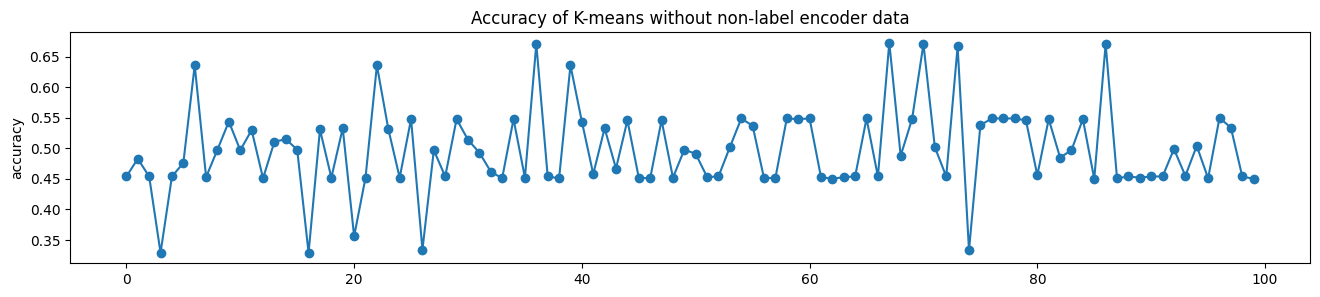

In [58]:
plt.figure(figsize=(16, 3))
plt.plot(np.arange(100), acc_results, marker='o')
plt.ylabel('accuracy')
plt.title('Accuracy of K-means without non-label encoder data')